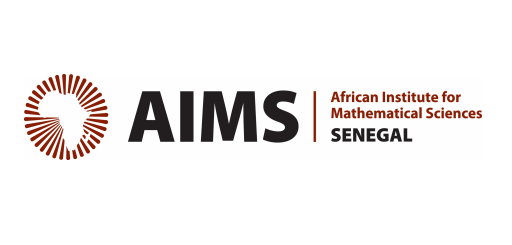

# <center> Projet Data Mining: GROUPE 8
   

METIKI ANNAN

HAIDARA FATOUMATA 

ADOU KOUAME MATHURIN

KENNE ANNINE DUCLAIRE


### INTRODUCTION

Ce projet s'inscrit dans le cadre de fin de cours de Data mining. Le problème posé est d'effectuer une classification supervisée dans le but de classer les chiffres manuscrits après avoir effectuer une analyse exploratoire. Il s’agit de prédire la variable CLASS (qu'on a déjà créée) dont la valeur est 0, 1, … ou 9 correspondant au chiffre manuscrit indiqué sur l’image. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [2]:
fac=pd.read_table('mfeat-fac',skipinitialspace=True,sep=' ',header=None)
fou=pd.read_table('mfeat-fou',skipinitialspace=True,sep=' ',header=None)
kar=pd.read_table('mfeat-kar',skipinitialspace=True,sep=' ',header=None)
mor=pd.read_table('mfeat-mor',skipinitialspace=True,sep=' ',header=None)
pix=pd.read_table('mfeat-pix',skipinitialspace=True,sep=' ',header=None)
zer=pd.read_table('mfeat-zer',skipinitialspace=True,sep=' ',header=None)

### Création de la base de données

In [3]:
data=pd.concat([fac,fou,kar,mor,pix,zer],axis=1)


### Création des noms des variables 

In [4]:
col=[]
for i in range(1,650):
    col.append('V{}'.format(i))


In [5]:
data.columns=col

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V640,V641,V642,V643,V644,V645,V646,V647,V648,V649
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 649 entries, V1 to V649
dtypes: float64(193), int64(456)
memory usage: 9.9 MB


In [164]:
data.describe().mean().T.he

V1    470.728369
V2    506.894011
V3    872.589509
V4    846.689096
V5    732.487577
dtype: float64

### Création de la variable Y

In [9]:
n=0
m=200
for i in range(10):
    if m<=2000:
        data.loc[n:m,'Target']=i
        
    n+=200
    m+=200

In [10]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V641,V642,V643,V644,V645,V646,V647,V648,V649,Target
0,98,236,531,673,607,647,2,9,3,6,...,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457,0.0
1,121,193,607,611,585,665,7,9,2,4,...,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567,0.0
2,115,141,590,605,557,627,12,6,3,3,...,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691,0.0
3,90,122,627,692,607,642,0,6,4,5,...,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814,0.0
4,157,167,681,666,587,666,8,6,1,4,...,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513,0.0


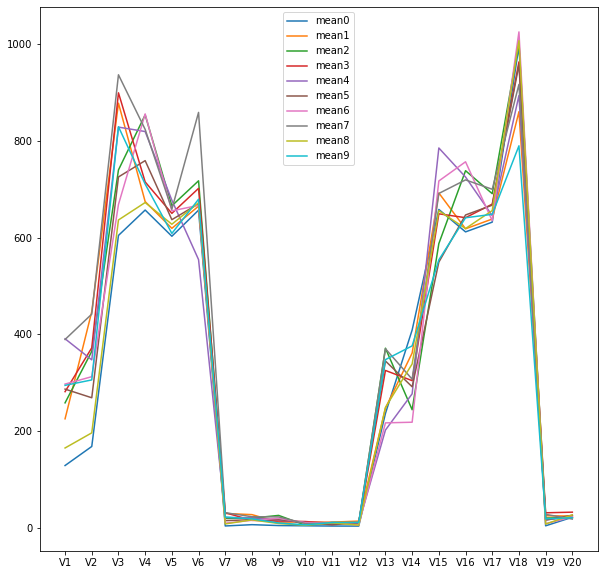

In [192]:
plt.figure(1,figsize=(10,10))
for i in range(10):
    plt.plot(data[data['Target']==i].describe().T['mean'].head(20), label=('mean{}'.format(i)))
    plt.legend()

On constate que les moyennes varient presque de la même façon pour chaque classe. 

In [139]:
correlation = data.corr().round(1)
correlation

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V641,V642,V643,V644,V645,V646,V647,V648,V649,Target
V1,1.0,0.5,0.6,0.5,0.3,0.2,0.5,0.3,0.5,0.4,...,0.1,0.5,0.1,-0.1,-0.4,0.1,0.6,-0.1,-0.7,0.3
V2,0.5,1.0,0.6,0.4,0.3,0.3,0.8,0.6,0.5,0.5,...,0.4,0.4,0.2,0.2,-0.1,0.4,0.4,0.2,-0.4,-0.1
V3,0.6,0.6,1.0,-0.1,0.1,0.3,0.9,0.3,0.1,0.4,...,0.4,0.5,0.1,0.1,-0.2,0.4,0.5,0.1,-0.5,0.1
V4,0.5,0.4,-0.1,1.0,0.5,0.1,-0.0,0.3,0.8,0.1,...,-0.1,0.1,0.4,0.2,-0.3,-0.1,0.2,0.2,-0.5,0.1
V5,0.3,0.3,0.1,0.5,1.0,0.1,0.1,0.2,0.5,0.2,...,-0.1,0.2,0.2,0.3,-0.3,-0.1,0.2,0.3,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V646,0.1,0.4,0.4,-0.1,-0.1,-0.1,0.4,0.4,-0.0,0.3,...,1.0,0.3,-0.2,-0.2,0.3,1.0,0.3,-0.2,0.1,-0.2
V647,0.6,0.4,0.5,0.2,0.2,0.2,0.4,0.2,0.1,0.2,...,0.3,0.9,-0.1,-0.2,-0.1,0.3,1.0,-0.2,-0.3,0.3
V648,-0.1,0.2,0.1,0.2,0.3,0.6,0.1,0.1,0.3,-0.1,...,-0.2,-0.2,0.3,1.0,-0.4,-0.2,-0.2,1.0,-0.1,-0.1
V649,-0.7,-0.4,-0.5,-0.5,-0.3,-0.4,-0.4,-0.0,-0.5,-0.2,...,0.1,-0.2,-0.2,-0.0,0.8,0.1,-0.3,-0.1,1.0,-0.2


<function matplotlib.pyplot.show(close=None, block=None)>

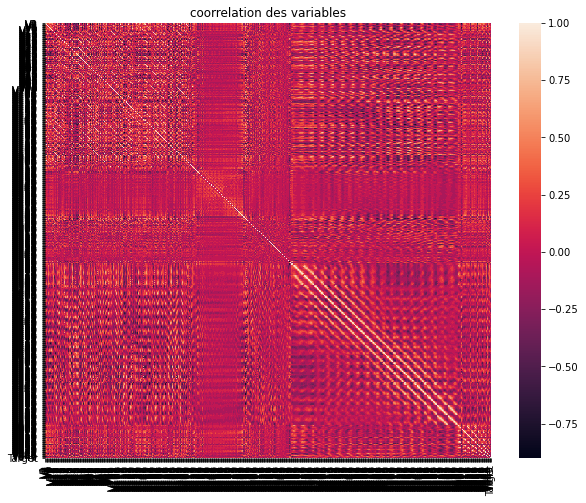

In [149]:
import seaborn as sn
plt.figure(figsize=(10,8))
plt.title('coorrelation des variables')
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.show

On constate qu'il n'y a pas de forte correlation entre les variables, par consequent il ne risque pas d'avoir un problème de colinéarité entre les variables.

### Séparation des variables X , Y et normalisation de X

In [11]:
Z=data.iloc[:,:data.shape[1]-1]
Y=data['Target']
X=(Z-Z.mean())/Z.std()

### Récupération de  X pour chaque classe

In [12]:
n=0
m=200
x=[]
for i in range(10):
    if m<=2000:
        x.append(X.iloc[n:m,:])
        
    n+=200
    m+=200

### Récupération de la variable Target pour chaque classe

In [13]:
n=0
m=200
y=[]
for i in range(10):
    if m<=2000:
        y.append(Y.iloc[n:m])
        
    n+=200
    m+=200

In [14]:
x[0].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V640,V641,V642,V643,V644,V645,V646,V647,V648,V649
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.862236,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.507767,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.958162,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.009379,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.284989,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833


In [15]:
y[0].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [152]:
y[0].plot

### Création des données d'entrainement et de test pour chacune des 10 classes

In [16]:
x_train=[];y_train=[];x_tt=[];y_tt=[]

In [17]:
for i in range(10):
    p=train_test_split(x[i],y[i],test_size=0.3,random_state=42)
    x_train.append(p[0])
    x_tt.append(p[1])
    y_train.append(p[2])
    y_tt.append(p[3])

### Création de données d'entrainement globales

In [18]:
X_train=pd.concat(x_train)
Y_train=pd.concat(y_train)


In [19]:
X_train.shape

(1400, 649)

In [20]:
Y_train.shape

(1400,)

### Création de données test et de validation globales

In [21]:
X_test_val=pd.concat(x_tt)
Y_test_val=pd.concat(y_tt)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, 
        test_size=0.2, shuffle=False)


In [22]:
X_test.shape

(480, 649)

In [23]:
X_val.shape

(120, 649)

### Model de Réseaux de Neurones

In [24]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.callbacks import EarlyStopping

In [25]:
network=Sequential()
network.add(Dense(100,activation = 'relu', input_shape=(649,))) 
network.add(Dense(150,activation = 'relu'))   # couche cachée
network.add(Dense(10,activation = 'sigmoid'))   

In [26]:
#earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=5)

In [27]:
network.compile(optimizer='adam',                # mise à jour des poids de connection
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])
model= network.fit(X_train, Y_train, batch_size=10, epochs=150, validation_data=(X_val,Y_val))

Epoch 1/150
140/140 [==============================] - 2s 10ms/step - loss: 0.7048 - accuracy: 0.7904 - val_loss: 0.2468 - val_accuracy: 0.9000
Epoch 2/150
140/140 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.9936 - val_loss: 0.1831 - val_accuracy: 0.9583
Epoch 3/150
140/140 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1971 - val_accuracy: 0.9417
Epoch 4/150
140/140 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy: 0.9667
Epoch 5/150
140/140 [==============================] - 0s 1ms/step - loss: 9.0526e-04 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9667
Epoch 6/150
140/140 [==============================] - 0s 1ms/step - loss: 7.0071e-04 - accuracy: 1.0000 - val_loss: 0.1527 - val_accuracy: 0.9667
Epoch 7/150
140/140 [==============================] - 0s 1ms/step - loss: 4.8678e-04 - accuracy: 1.0000 - val_loss: 0.1527 - val_acc

140/140 [==============================] - 0s 1ms/step - loss: 2.3074e-06 - accuracy: 1.0000 - val_loss: 0.1966 - val_accuracy: 0.9750
Epoch 57/150
140/140 [==============================] - 0s 1ms/step - loss: 2.0490e-06 - accuracy: 1.0000 - val_loss: 0.1970 - val_accuracy: 0.9750
Epoch 58/150
140/140 [==============================] - 0s 1ms/step - loss: 1.8868e-06 - accuracy: 1.0000 - val_loss: 0.1977 - val_accuracy: 0.9750
Epoch 59/150
140/140 [==============================] - 0s 1ms/step - loss: 1.8609e-06 - accuracy: 1.0000 - val_loss: 0.1985 - val_accuracy: 0.9750
Epoch 60/150
140/140 [==============================] - 0s 1ms/step - loss: 1.6619e-06 - accuracy: 1.0000 - val_loss: 0.1994 - val_accuracy: 0.9750
Epoch 61/150
140/140 [==============================] - 0s 1ms/step - loss: 1.6101e-06 - accuracy: 1.0000 - val_loss: 0.1991 - val_accuracy: 0.9750
Epoch 62/150
140/140 [==============================] - 0s 1ms/step - loss: 1.4804e-06 - accuracy: 1.0000 - val_loss: 0.2002 

140/140 [==============================] - 0s 2ms/step - loss: 2.6299e-08 - accuracy: 1.0000 - val_loss: 0.2290 - val_accuracy: 0.9750
Epoch 112/150
140/140 [==============================] - 0s 1ms/step - loss: 2.3133e-08 - accuracy: 1.0000 - val_loss: 0.2296 - val_accuracy: 0.9750
Epoch 113/150
140/140 [==============================] - 0s 1ms/step - loss: 2.8760e-08 - accuracy: 1.0000 - val_loss: 0.2295 - val_accuracy: 0.9750
Epoch 114/150
140/140 [==============================] - 0s 1ms/step - loss: 2.2452e-08 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.9750
Epoch 115/150
140/140 [==============================] - 0s 1ms/step - loss: 2.1186e-08 - accuracy: 1.0000 - val_loss: 0.2308 - val_accuracy: 0.9750
Epoch 116/150
140/140 [==============================] - 0s 1ms/step - loss: 2.3609e-08 - accuracy: 1.0000 - val_loss: 0.2312 - val_accuracy: 0.9750
Epoch 117/150
140/140 [==============================] - 0s 1ms/step - loss: 1.6445e-08 - accuracy: 1.0000 - val_loss: 0

In [28]:
loss, score=network.evaluate(X_test,Y_test)
print('score:', score)

15/15 [==============================] - 0s 719us/step - loss: 0.0741 - accuracy: 0.9917
score: 0.9916666746139526


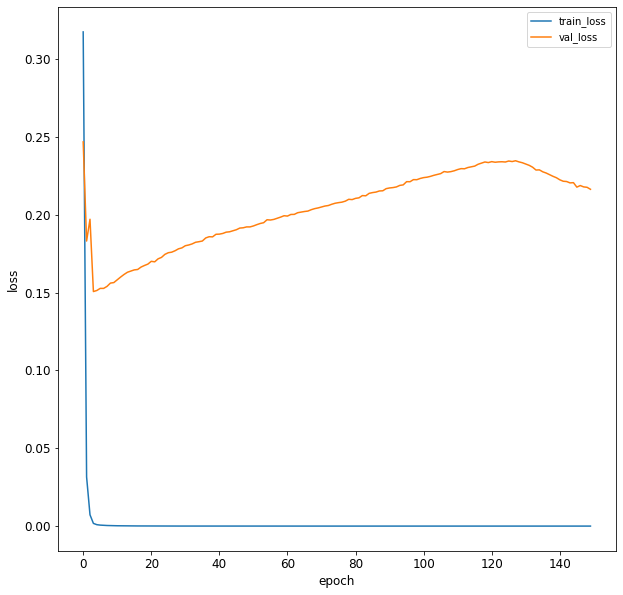

In [29]:
plot_df = pd.DataFrame.from_dict({'train_loss':model.history['loss'], 'val_loss':model.history['val_loss']})
plot_df.plot(logy=False,figsize=(10,10),fontsize=12)
plt.xlabel('epoch',fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [30]:
predictions = network.predict_classes(X_test)
eval_df=pd.DataFrame(predictions)

C:\Users\AIMSSN\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [130]:
D=pd.concat([pd.DataFrame(Y_test.values),eval_df],axis=1)
D.columns={"True","Predict"}
D

,Predict,True
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
475,7.0,7
476,7.0,7
477,7.0,7
478,7.0,7


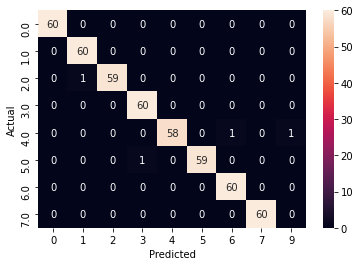

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.98      1.00      0.99        60
         2.0       1.00      0.98      0.99        60
         3.0       0.98      1.00      0.99        60
         4.0       1.00      0.97      0.98        60
         5.0       1.00      0.98      0.99        60
         6.0       0.98      1.00      0.99        60
         7.0       1.00      1.00      1.00        60
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.99      0.99      0.99       480



C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':predictions}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, predictions))

Evolution des density des predicts et Trues values

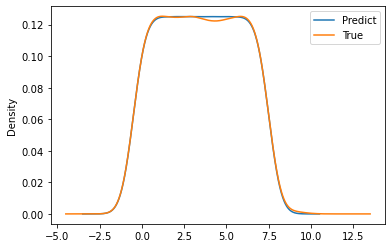

In [131]:
D.plot.density()
plt.show()

### LDA

In [118]:
#importation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#instanciation
lda = LinearDiscriminantAnalysis()
#apprentissage
lda.fit(X_train,Y_train)
#liste des champs
print(dir(lda))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_max_components', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_solve_eigen', '_solve_lsqr', '_solve_svd', '_validate_data', 'classes_', 'coef_', 'covariance_estimator', 'decision_function', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_params', 'intercept_', 'means_', 'n_components', 'n_features_in_', 'predict', 'predict_log_proba', 'predict_proba', 'priors', 'priors_', 'scalings_', 'score', 'set_params', 'shrinkage', 'solver', 'store_covariance', 'tol', 'transform', 'xbar_']


In [35]:
print(lda.coef_)

[[-7.29234173e-01 -6.87498045e+00  1.51675787e+02 ... -1.84766221e+01
  -1.14065894e+02  1.84987909e+02]
 [-1.95719276e+01 -2.19915651e+00  7.87055905e-01 ...  7.93466458e-01
  -2.50813164e+02 -3.03078890e+00]
 [ 3.68243959e+00  1.09518674e+00 -4.44456047e+01 ...  1.33269125e+01
   1.31002109e+02 -2.16310365e+02]
 ...
 [ 6.26801691e-01  1.88549216e+01 -1.11395014e+02 ...  2.11391643e+01
  -6.80394998e+02  6.68994798e+01]
 [ 1.76600965e+01 -1.60357492e+01  1.48613032e+02 ... -2.10353538e+01
   4.17594376e+01  1.30131375e+02]
 [ 7.79717141e+00 -6.29216480e-01 -7.33084922e+01 ...  3.33415730e+00
  -1.95416594e+02 -1.43710481e+02]]


In [36]:
print(lda.coef_.shape)

(10, 649)


In [37]:
print(lda.classes_)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [38]:
tmp= pd.DataFrame(lda.coef_.transpose(),columns=lda.classes_,index=X_train.columns)
print(tmp)

             0.0         1.0         2.0         3.0         4.0         5.0  \
V1     -0.729234  -19.571928    3.682440  -10.885966    5.310522    4.793690   
V2     -6.874980   -2.199157    1.095187   -1.624425    6.601696   20.045605   
V3    151.675787    0.787056  -44.445605  -85.510488  -68.541741  -36.990541   
V4     56.782484   45.517267   57.663866  -26.838039   54.010303  -80.608880   
V5    -57.519711   17.305696  -26.352216   21.636556    7.808630    1.477390   
...          ...         ...         ...         ...         ...         ...   
V645  -86.914082    9.894476   41.447531  -69.818283  189.009630  -93.719576   
V646   90.825971  -35.431957  -14.827483  -35.238601  -16.418849  -43.845166   
V647  -18.476622    0.793466   13.326913   -1.268390   -3.902456   12.802107   
V648 -114.065894 -250.813164  131.002109 -260.599932  436.878500  522.518245   
V649  184.987909   -3.030789 -216.310365   56.768613  -44.549590  -17.808686   

             6.0         7.0         8.

In [39]:
print(lda.intercept_)

[-321.2059712  -114.62680985 -250.33919441 -114.59837527 -194.03928481
 -144.23490926 -165.43710925 -150.15363731 -313.12304303  -98.2215623 ]


In [40]:
np.set_printoptions(suppress=True,linewidth=120,precision=4)

In [41]:
print(Y_test.value_counts(normalize=True))

7.0    0.125
6.0    0.125
5.0    0.125
4.0    0.125
3.0    0.125
2.0    0.125
1.0    0.125
0.0    0.125
Name: Target, dtype: float64


In [42]:
#la fonction "score" fournit le taux de succès
print(lda.score(X_test,Y_test))

0.9875


In [119]:
#prediction simple
pred = lda.predict(X_test)
#distribution des classes prédites
print(np.unique(pred,return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6., 7.]), array([59, 65, 58, 59, 59, 61, 60, 59], dtype=int64))


59, 65, 58, 59, 59, 61, 60, 59 observations ont été prédites respectivement 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. La matrice de confusion est
issue de la confrontation entre ces prédictions et les classes observées.

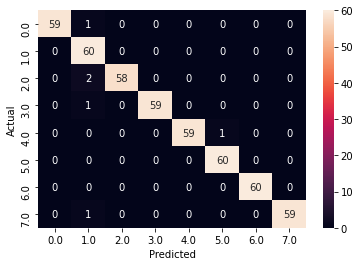

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.98      1.00      0.99        60
         2.0       1.00      0.98      0.99        60
         3.0       0.98      1.00      0.99        60
         4.0       1.00      0.97      0.98        60
         5.0       1.00      0.98      0.99        60
         6.0       0.98      1.00      0.99        60
         7.0       1.00      1.00      1.00        60
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.99      0.99      0.99       480



C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, predictions))

In [132]:
l=pd.concat([pd.DataFrame(Y_test.values),pd.DataFrame(pred)],axis=1)
l.columns={"True","Predict"}
l

,Predict,True
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
475,7.0,7.0
476,7.0,7.0
477,7.0,7.0
478,7.0,7.0


Evolution des density des predicts et Trues values

<AxesSubplot:ylabel='Density'>

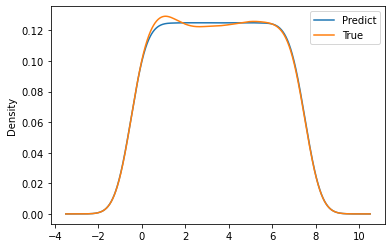

In [133]:
l.plot.density()

La fonction transform() de « scikit-learn » calcule la représentation factorielle des individus. Le
nombre de facteurs est égal à $min(K – 1, p) = min (10 – 1, 649) = 9$.

In [75]:
#projection dans l'espace facoriel
Fact = lda.transform(X_train)
p=np.round(lda.predict(X_train))
print(Fact[:,:2])
f=Fact[:,:2]

[[-17.2592  -4.1079]
 [-17.5328  -4.7996]
 [-19.2593  -4.0562]
 ...
 [ -2.2861  -4.3411]
 [ -2.5114  -4.9206]
 [ -3.4734  -4.7095]]


Avec un repère factoriel à 2 dimensions, nous pouvons projeter les individus dans le plan.

<AxesSubplot:xlabel='F1', ylabel='F2'>

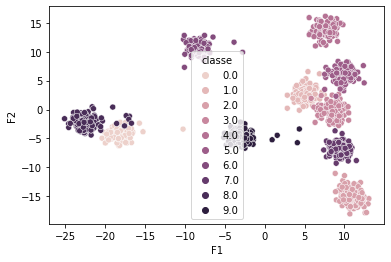

In [142]:
%matplotlib inline
#data frame pour représentation graphique
dfFact = pd.DataFrame(f,columns=['F1','F2'])
dfFact['classe'] = p

#représentation graphique
sns.scatterplot(x="F1",y="F2",hue='classe',data=dfFact,legend='full')


### Methode des KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
voisins = []
r2s = []
for n in range(1, 10):
    knn =KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    accu = accuracy_score(Y_test, knn.predict(X_test))
    voisins.append(n)
    r2s.append(accu)

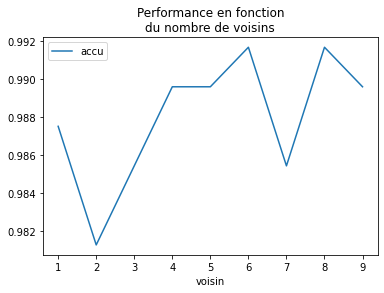

In [107]:
df = pd.DataFrame(dict(voisin=voisins, accu=r2s))
ax = df.plot(x='voisin', y='accu')
ax.set_title("Performance en fonction\ndu nombre de voisins");

In [114]:
predec=knn.predict(X_test)


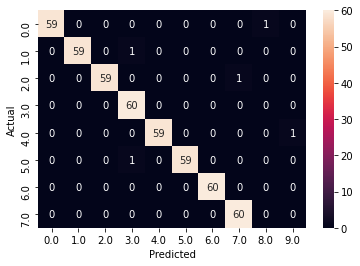

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.98      1.00      0.99        60
         2.0       1.00      0.98      0.99        60
         3.0       0.98      1.00      0.99        60
         4.0       1.00      0.97      0.98        60
         5.0       1.00      0.98      0.99        60
         6.0       0.98      1.00      0.99        60
         7.0       1.00      1.00      1.00        60
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.99      0.99      0.99       480



C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':predec}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, predictions))

### Methode Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
model1=RandomForestClassifier()
model1.fit(X_train,Y_train)
pred1=model1.predict(X_test)
accuracy_score(Y_test,pred)

0.9916666666666667

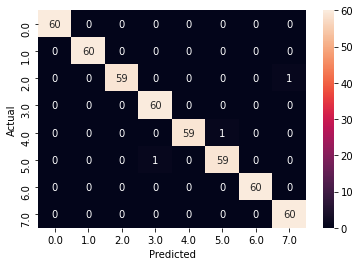

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.98      1.00      0.99        60
         2.0       1.00      0.98      0.99        60
         3.0       0.98      1.00      0.99        60
         4.0       1.00      0.97      0.98        60
         5.0       1.00      0.98      0.99        60
         6.0       0.98      1.00      0.99        60
         7.0       1.00      1.00      1.00        60
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99       480
   macro avg       0.88      0.88      0.88       480
weighted avg       0.99      0.99      0.99       480



C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AIMSSN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':pred1}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, predictions))

Dans ce projet nous avons présenté des cas d'étude en utulisant les modèles de classification: Reseau de Neurones, LDA,KNN et Random Forest. Tous ces modèles semblent donner de bons score de 0.99 environs. Notons dans le cas de l'analyse discriminante le score élévé ne permet de conclure. C'est pour cela que l'exploration de d'autres méthodes viennent confirmer les résultats du modèle de l'analyse discriminante. Aussi lorsqu'on observe la densité entre les valeurs prédictes et les vraies valeurs on remarque une allure presque identique. Avec par exemple la methode des kNN, on a une performance du modèle pour k=6 ou 8 voisins.
